In [1]:
# reload imports on every cell exectution
%load_ext autoreload
%autoreload 2

In [2]:
# load corpus dataset
import os
import pandas as pd
import matplotlib.pyplot as plt

from datasets import load_from_disk
from src.data.classes import DatasetSplitType
from src.data.dataset_splitting.dataset_splits import create_splits_from_corpus_dataset
from collections import defaultdict

from src.features.build_features import filter_queries_for_few_shot_setting, filter_passages_for_few_shot_setting, \
    create_dataset_for_multiple_negatives_ranking_loss

# load dataset

corpus_dataset_name = "corpus_dataset_v3"
in_distribution_split_dataset_name = "dataset_split_in_distribution_from_v3"
project_dir = "/home/christian/PycharmProjects/ethikchat-experiment-argument-classification"

dataset_folder = os.path.join(project_dir, "data/processed/with_context")
dataset_path = os.path.join(dataset_folder, corpus_dataset_name)
output_folder = os.path.join(project_dir, f"reports/dataset_statistics/{corpus_dataset_name}/{in_distribution_split_dataset_name}")

corpus_dataset = load_from_disk(dataset_path)
# load split dataset
in_distribution_split = create_splits_from_corpus_dataset(corpus_dataset=corpus_dataset,
                                                          dataset_split_type=DatasetSplitType.InDistribution,
                                                          save_folder=dataset_folder,
                                                          dataset_save_name=in_distribution_split_dataset_name)


Dataset already exists at /home/christian/PycharmProjects/ethikchat-experiment-argument-classification/data/processed/with_context/dataset_split_in_distribution_from_v3. Loading it.


/home/christian/PycharmProjects/ethikchat-experiment-argument-classification/src/data/dataset_splitting/utils.py:97: UserWarning: Overlapping texts between train and validation (but no overlapping query ids, so theses are not the same anchors): 1
Example texts: ['Wer haftet wenn die KI einen Fehler macht?']
  warnings.warn(


In [3]:
import copy


def get_num_datapoints_for_trainset(ts, num_shots_queries) -> int:
    ts_new = filter_queries_for_few_shot_setting(ts, num_shots_queries, True)
    return len(create_dataset_for_multiple_negatives_ranking_loss(ts_new))


res = defaultdict(int)
for nq in [
    1, 2, 4, 8, 16, 32, 64, 128, 256, 300, 512,
    1024, -1]:
    ts_pass = in_distribution_split["train"].copy()
    ts_pass["queries"] = copy.deepcopy(in_distribution_split["train"]["queries"])
    ts_pass["passages"] = copy.deepcopy(in_distribution_split["train"]["passages"])
    ts_pass["queries_relevant_passages_mapping"] = copy.deepcopy(
        in_distribution_split["train"]["queries_relevant_passages_mapping"])
    ts_pass["queries_trivial_passages_mapping"] = copy.deepcopy(
        in_distribution_split["train"]["queries_trivial_passages_mapping"])

    res[nq] = get_num_datapoints_for_trainset(ts_pass, nq)

res

72 920
48 243
68 654
30 70


Filter:   0%|          | 0/1887 [00:00<?, ? examples/s]

The folllowing passages where removed:
{'id': 3, 'text': 'Eine KI kann mehr Wissen als ein Mensch', 'label': 'Z.P3', 'discussion_scenario': 'MEDAI', 'passage_source': 'user_utterance', 'retrieved_query_id': 5}
{'id': 7, 'text': 'Nein, medizinische Behandlung sollte meiner Meinung nach auf persoenlicher Ebene stattfinden, denn viele Krankeiten nur durch ausfuehrliche Anamnese aufgedeckt werden koennen und zum Teil psychologisch behaftet sind', 'label': 'Z.K1', 'discussion_scenario': 'MEDAI', 'passage_source': 'user_utterance', 'retrieved_query_id': 12}
{'id': 10, 'text': 'Nein, ich bezihe mich nicht auf Fehler, sondern auf eine begrenzte, eindimensionale Handlungsfaehigkeit ', 'label': 'Z.K6', 'discussion_scenario': 'MEDAI', 'passage_source': 'user_utterance', 'retrieved_query_id': 16}
{'id': 13, 'text': 'Die KI kann von mehreren Nationen entwickelt werden. Dadurch sinken die Kosten', 'label': 'Z.P5', 'discussion_scenario': 'MEDAI', 'passage_source': 'user_utterance', 'retrieved_query_i

Filter:   0%|          | 0/1887 [00:00<?, ? examples/s]

Filter:   0%|          | 0/1887 [00:00<?, ? examples/s]

132 920
81 243
128 654
42 70


Filter:   0%|          | 0/1887 [00:00<?, ? examples/s]

The folllowing passages where removed:
{'id': 14, 'text': 'Sobald eine selbst lernende Ki entwickelt wurde, wird das Entwickeln nicht mehr viel kosten', 'label': 'Z.P5', 'discussion_scenario': 'MEDAI', 'passage_source': 'user_utterance', 'retrieved_query_id': 20}
{'id': 15, 'text': 'Dafuer kann der First Level Support von Aerzten abgewendet werden und durch KIs uebernommen werden', 'label': 'Z.P5', 'discussion_scenario': 'MEDAI', 'passage_source': 'user_utterance', 'retrieved_query_id': 21}
{'id': 26, 'text': 'Der Persoenliche Kontakt zwischen dem Artzt und dem Patienten ist sehr wichtig, sowohl fuer Artzt als auch Patient. Der Patient kommt sich nicht so vor wie in einem Fastfood Resturant in dem er nur abgefertigt wird sondern mit einem richtigen Menschen als gegen ueber fuehlt er sich Wertgeschaetzt und versorgt, was auch positiv zur Heiling beitragen kann', 'label': 'Z.K1', 'discussion_scenario': 'MEDAI', 'passage_source': 'user_utterance', 'retrieved_query_id': 34}
{'id': 27, 'tex

Filter:   0%|          | 0/1887 [00:00<?, ? examples/s]

Filter:   0%|          | 0/1887 [00:00<?, ? examples/s]

229 920
129 243
224 654
55 70


Filter:   0%|          | 0/1887 [00:00<?, ? examples/s]

The folllowing passages where removed:
{'id': 28, 'text': 'Selbst wenn die KI ausgebildet ist um auch emotional fuer den Menschen zu sorgen, so ist das nicht die selbe Fuersorge und emotionale Bindung wie sie zwischen zwei Menschen entstehen kann. Niemand wird jemals ein Geraet als Bezugs Person sehen da fehlen die echten Gefuehle und selbst gemachte Erfahrungen aus der Realen Welt ', 'label': 'Z.K1', 'discussion_scenario': 'MEDAI', 'passage_source': 'user_utterance', 'retrieved_query_id': 36}
{'id': 31, 'text': 'Das ist ja noch schlechter, man wuerde Patienten mit kleineren Problemen diskriminieren und ihnen das Geguehl geben dass sie weniger Beruecksichtigt werden als Patienten mit schlimmeren Problemen ', 'label': 'Z.K1', 'discussion_scenario': 'MEDAI', 'passage_source': 'user_utterance', 'retrieved_query_id': 39}
{'id': 32, 'text': 'Patienten die nichts schlimmes haben wuerden im Gesundheits System nicht beruecksichtigt ', 'label': 'Z.K1', 'discussion_scenario': 'MEDAI', 'passage_s

Filter:   0%|          | 0/1887 [00:00<?, ? examples/s]

Filter:   0%|          | 0/1887 [00:00<?, ? examples/s]

367 920
180 243
361 654
66 70


Filter:   0%|          | 0/1887 [00:00<?, ? examples/s]

The folllowing passages where removed:
{'id': 63, 'text': 'Bei einer Aerztlichen Untersuchung durch eine KI wuerde der menschliche Kontakt fehlen', 'label': 'Z.K1', 'discussion_scenario': 'MEDAI', 'passage_source': 'user_utterance', 'retrieved_query_id': 81}
{'id': 64, 'text': 'Ein Arzt kann mit eher einfuehlsamen Worten sowie geschulte Zuwendung eine beruhigende Wirkung auf den Patienten haben, wohingegen KIs nur die medizinischen fakten aufzaehlen wuerden', 'label': 'Z.K1', 'discussion_scenario': 'MEDAI', 'passage_source': 'user_utterance', 'retrieved_query_id': 83}
{'id': 70, 'text': 'Das stimmt, allerdings wuerde der Arztbesuch deutlich unangenehmer werden', 'label': 'Z.K1', 'discussion_scenario': 'MEDAI', 'passage_source': 'user_utterance', 'retrieved_query_id': 89}
{'id': 87, 'text': 'KI sehen nur die krankheit nicht menschen', 'label': 'Z.K1', 'discussion_scenario': 'MEDAI', 'passage_source': 'user_utterance', 'retrieved_query_id': 113}
{'id': 96, 'text': 'Was ist mit der Mensch

Filter:   0%|          | 0/1887 [00:00<?, ? examples/s]

Filter:   0%|          | 0/1887 [00:00<?, ? examples/s]

547 920
229 243
491 654


Filter:   0%|          | 0/1887 [00:00<?, ? examples/s]

The folllowing passages where removed:
{'id': 107, 'text': 'Kommunikation mit realen Menschen ist angenehmer ', 'label': 'Z.K1', 'discussion_scenario': 'MEDAI', 'passage_source': 'user_utterance', 'retrieved_query_id': 141}
{'id': 114, 'text': 'Aerztinnen als reale Personen sind nicht eins zu eins durch KI zu ersetzen', 'label': 'Z.K1', 'discussion_scenario': 'MEDAI', 'passage_source': 'user_utterance', 'retrieved_query_id': 148}
{'id': 198, 'text': 'Zwischenmenschlichkeit fehlend', 'label': 'Z.K1', 'discussion_scenario': 'MEDAI', 'passage_source': 'user_utterance', 'retrieved_query_id': 274}
{'id': 199, 'text': 'Im Gegensatz zu Maschinen haben Menschen Empathiefaehigkeit die eine wichtige Rolle spielt. ', 'label': 'Z.K1', 'discussion_scenario': 'MEDAI', 'passage_source': 'user_utterance', 'retrieved_query_id': 275}
{'id': 206, 'text': 'KI in der Medizin fuehrt dazu, dass Patienten alleine bleiben, waehrend Aerztinnen sich nur noch mit Daten befassen', 'label': 'Z.K1', 'discussion_scen

Filter:   0%|          | 0/1887 [00:00<?, ? examples/s]

Filter:   0%|          | 0/1887 [00:00<?, ? examples/s]

737 920
578 654


Filter:   0%|          | 0/1887 [00:00<?, ? examples/s]

The folllowing passages where removed:
{'id': 431, 'text': 'Ich finde die medKI unpersoenlich und kann ich nicht vertrauen zudem finde ich die Kommunikation mit ihr schwierig', 'label': 'Z.K1', 'discussion_scenario': 'MEDAI', 'passage_source': 'user_utterance', 'retrieved_query_id': 602}
{'id': 448, 'text': 'Die zwischenmenschliche Kommunikation fehlt, darunter kann die Sozialisierung der Menschen leiden. ', 'label': 'Z.K1', 'discussion_scenario': 'MEDAI', 'passage_source': 'user_utterance', 'retrieved_query_id': 625}
{'id': 472, 'text': 'Ich denke nicht, dass eine Aerztliche KI sinnvoll waere. Bei einer Behandlung ist nicht nur eine rationale Entscheidung wichtig sondern auch die Art, wie Sie durch soziale Interaktionen getroffen wird', 'label': 'Z.K1', 'discussion_scenario': 'MEDAI', 'passage_source': 'user_utterance', 'retrieved_query_id': 656}
{'id': 473, 'text': 'Allerdings kann mit einer KI keine menschliche Interaktion stattfinden', 'label': 'Z.K1', 'discussion_scenario': 'MEDAI

Filter:   0%|          | 0/1887 [00:00<?, ? examples/s]

Filter:   0%|          | 0/1887 [00:00<?, ? examples/s]

861 920
631 654


Filter:   0%|          | 0/1887 [00:00<?, ? examples/s]

The folllowing passages where removed:
{'id': 921, 'text': 'Wenn jede Entscheidung durch einen Menschen verifiziert wird dann liegt die Verantwortung beim Menschen.', 'label': 'NZ.K10', 'discussion_scenario': 'MEDAI', 'passage_source': 'user_utterance', 'retrieved_query_id': 1250}
{'id': 922, 'text': 'Da keiner die Antworten der Ki prueft', 'label': 'NZ.K10', 'discussion_scenario': 'MEDAI', 'passage_source': 'user_utterance', 'retrieved_query_id': 1255}
{'id': 940, 'text': 'Ich finde beiden sollten sich ergaenzen', 'label': 'NZ.K10', 'discussion_scenario': 'MEDAI', 'passage_source': 'user_utterance', 'retrieved_query_id': 1277}
{'id': 941, 'text': 'Nein mein Argument ist das sich beide gut ergaenzen Aerztin und aertzte und Ki', 'label': 'NZ.K10', 'discussion_scenario': 'MEDAI', 'passage_source': 'user_utterance', 'retrieved_query_id': 1278}
{'id': 948, 'text': 'das stimmt, es geht ja aber nicht um die vollstaendige ersetzung durch ki sondern ein zusaetzliches angebot ', 'label': 'NZ.K1

Filter:   0%|          | 0/1887 [00:00<?, ? examples/s]

Filter:   0%|          | 0/1887 [00:00<?, ? examples/s]

Filter:   0%|          | 0/1887 [00:00<?, ? examples/s]

The folllowing passages where removed:


Filter:   0%|          | 0/1887 [00:00<?, ? examples/s]

Filter:   0%|          | 0/1887 [00:00<?, ? examples/s]

The folllowing passages where removed:
The folllowing passages where removed:
The folllowing passages where removed:
The folllowing passages where removed:


/home/christian/PycharmProjects/ethikchat-experiment-argument-classification/src/features/build_features.py:174: UserWarning: Parameter 'num_shots' < 0. All queries are kept in the dataset.
  warnings.warn("Parameter 'num_shots' < 0. All queries are kept in the dataset.")


defaultdict(int,
            {1: 5901,
             2: 10827,
             4: 19104,
             8: 32090,
             16: 49796,
             32: 71145,
             64: 92070,
             128: 107695,
             256: 107695,
             300: 107695,
             512: 107695,
             1024: 107695,
             -1: 107695})

In [4]:
import copy

from src.statistics.in_distribution_split.utils import get_query_difference_between_num_shots, \
    get_passage_difference_between_num_shots, get_split_key_count_per_scenario_label

# print(get_query_difference_between_num_shots(in_distribution_split["train"], -1, 1024))

print(get_passage_difference_between_num_shots(in_distribution_split["train"], -1, 1024))

The folllowing passages where removed:
[]


In [5]:
from src.statistics.in_distribution_split.utils import plot_query_count_per_scenario_label


number_of_queries_per_scenario_label = get_split_key_count_per_scenario_label(in_distribution_split, "queries")
# plot_query_count_per_scenario_label(number_of_queries_per_scenario_label)

number_of_queries_per_scenario_label



Counting 'queries' labels for splits '['train', 'validation', 'test']'


,scenario,label,split,count
0,MEDAI,Z.K1,train,86
1,MEDAI,Z.P1-1-1,train,6
2,MEDAI,Z.P3,train,11
3,MEDAI,Z.P5,train,25
4,MEDAI,Z.P4-1,train,18
...,...,...,...,...
442,REFAI,Z.P5,test,3
443,REFAI,Z.K6,test,1
444,REFAI,Z.K5,test,1
445,REFAI,Z.P3-3,test,1


In [6]:
from src.statistics.in_distribution_split.utils import find_uncovered_labels

uncovered = find_uncovered_labels(in_distribution_split)
if uncovered:
    print("Found labels with no train coverage:")
    for entry in uncovered:
        print(f" • {entry['scenario']} / {entry['label']}: "
              f"train={entry['train']}, val={entry['validation']}, test={entry['test']}")
else:
    print("All (scenario, label) pairs in val/test occur at least once in train.")


All (scenario, label) pairs in val/test occur at least once in train.


/tmp/ipykernel_398526/1860812498.py:32: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
/tmp/ipykernel_398526/1860812498.py:32: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
/tmp/ipykernel_398526/1860812498.py:32: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
/tmp/ipykernel_398526/1860812498.py:32: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


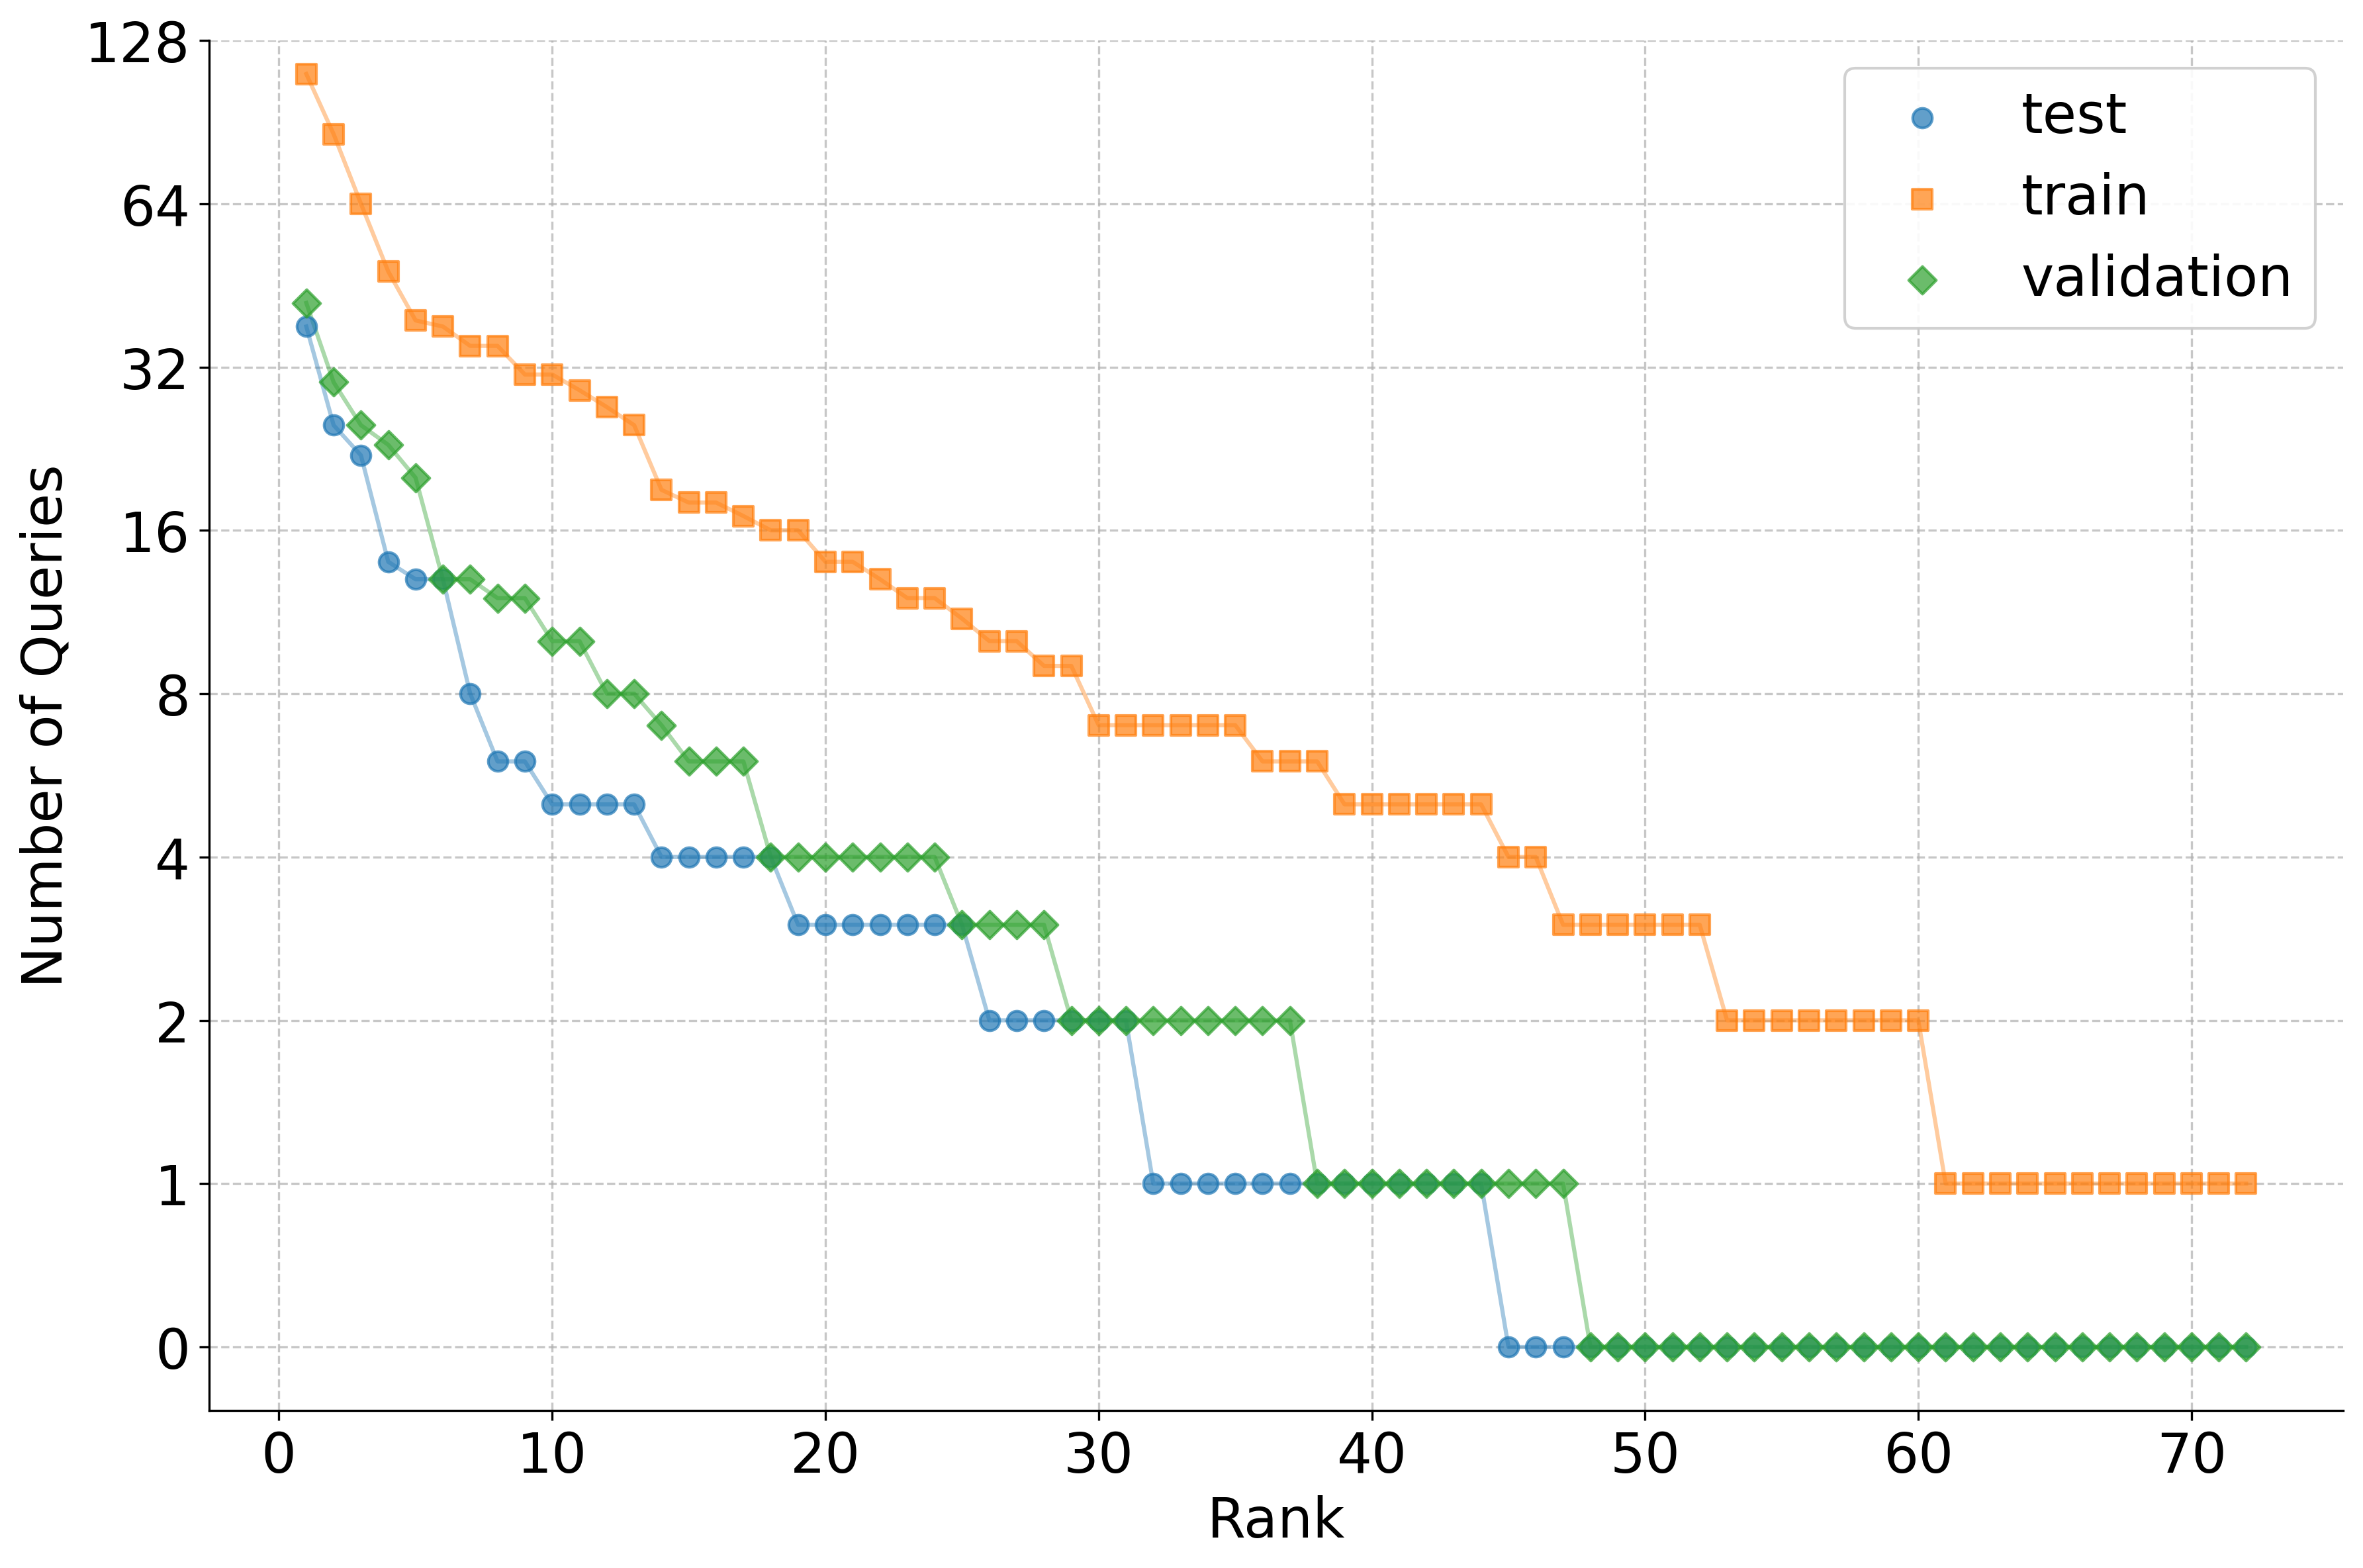

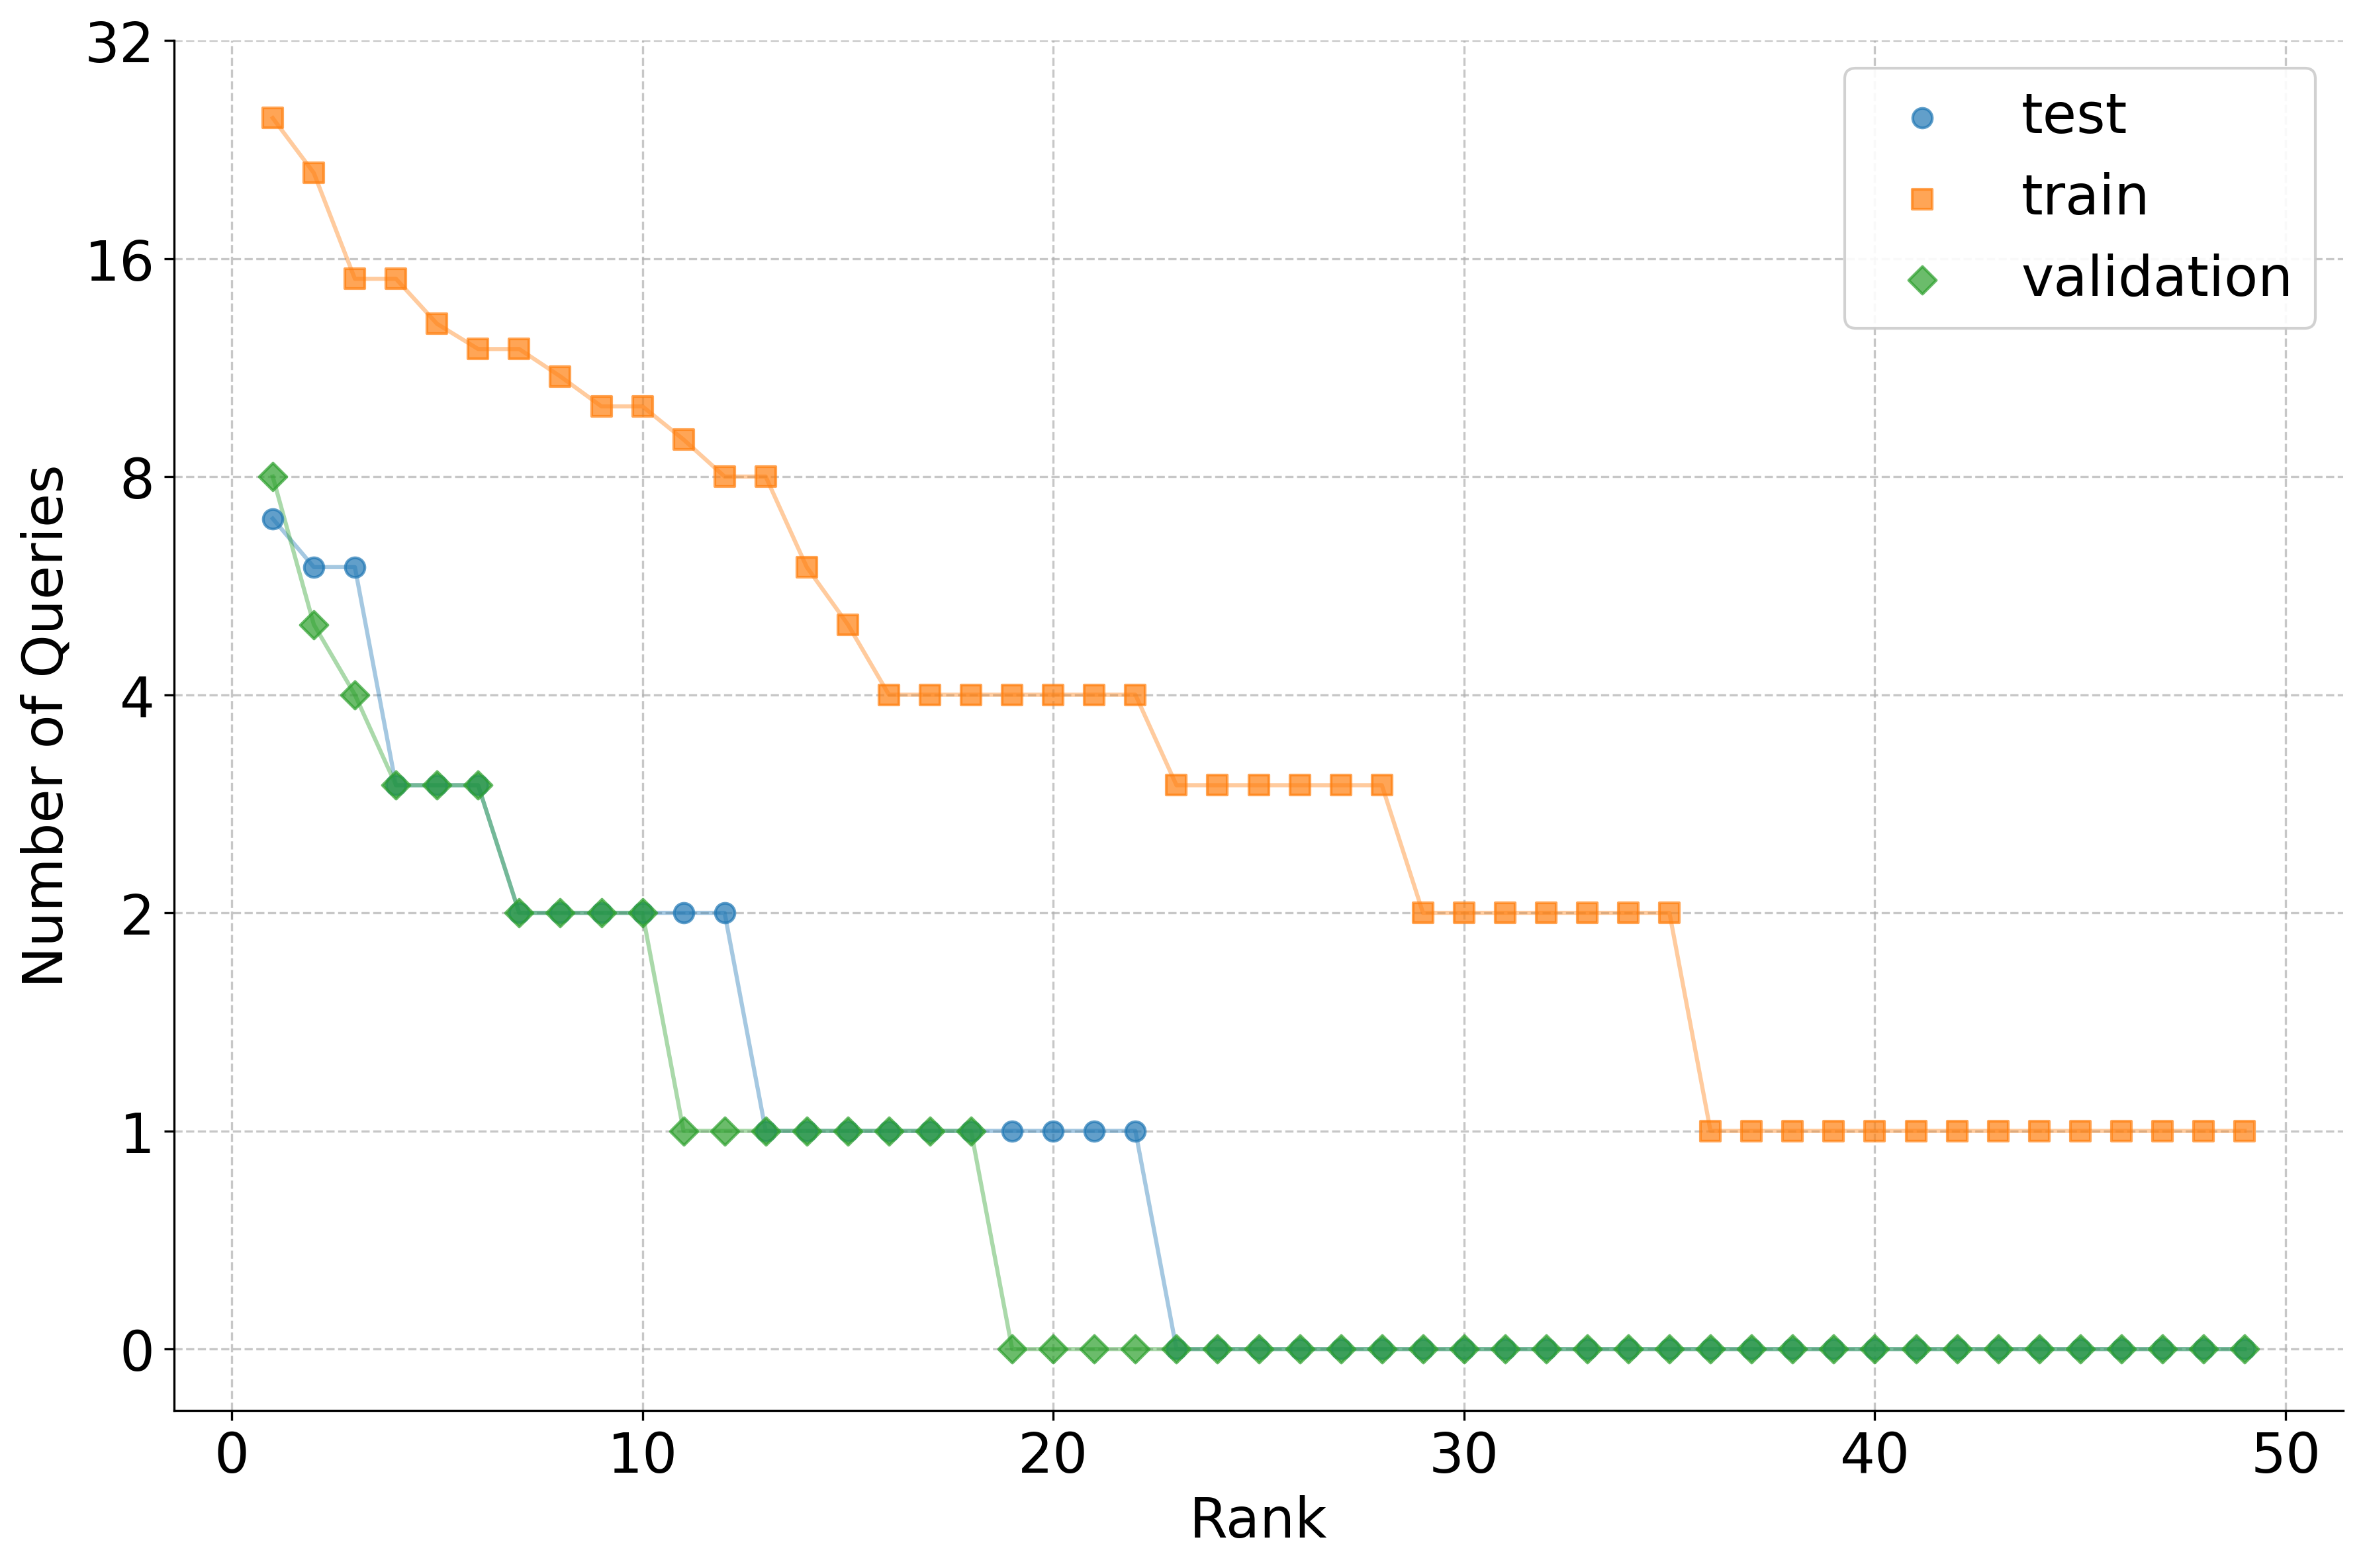

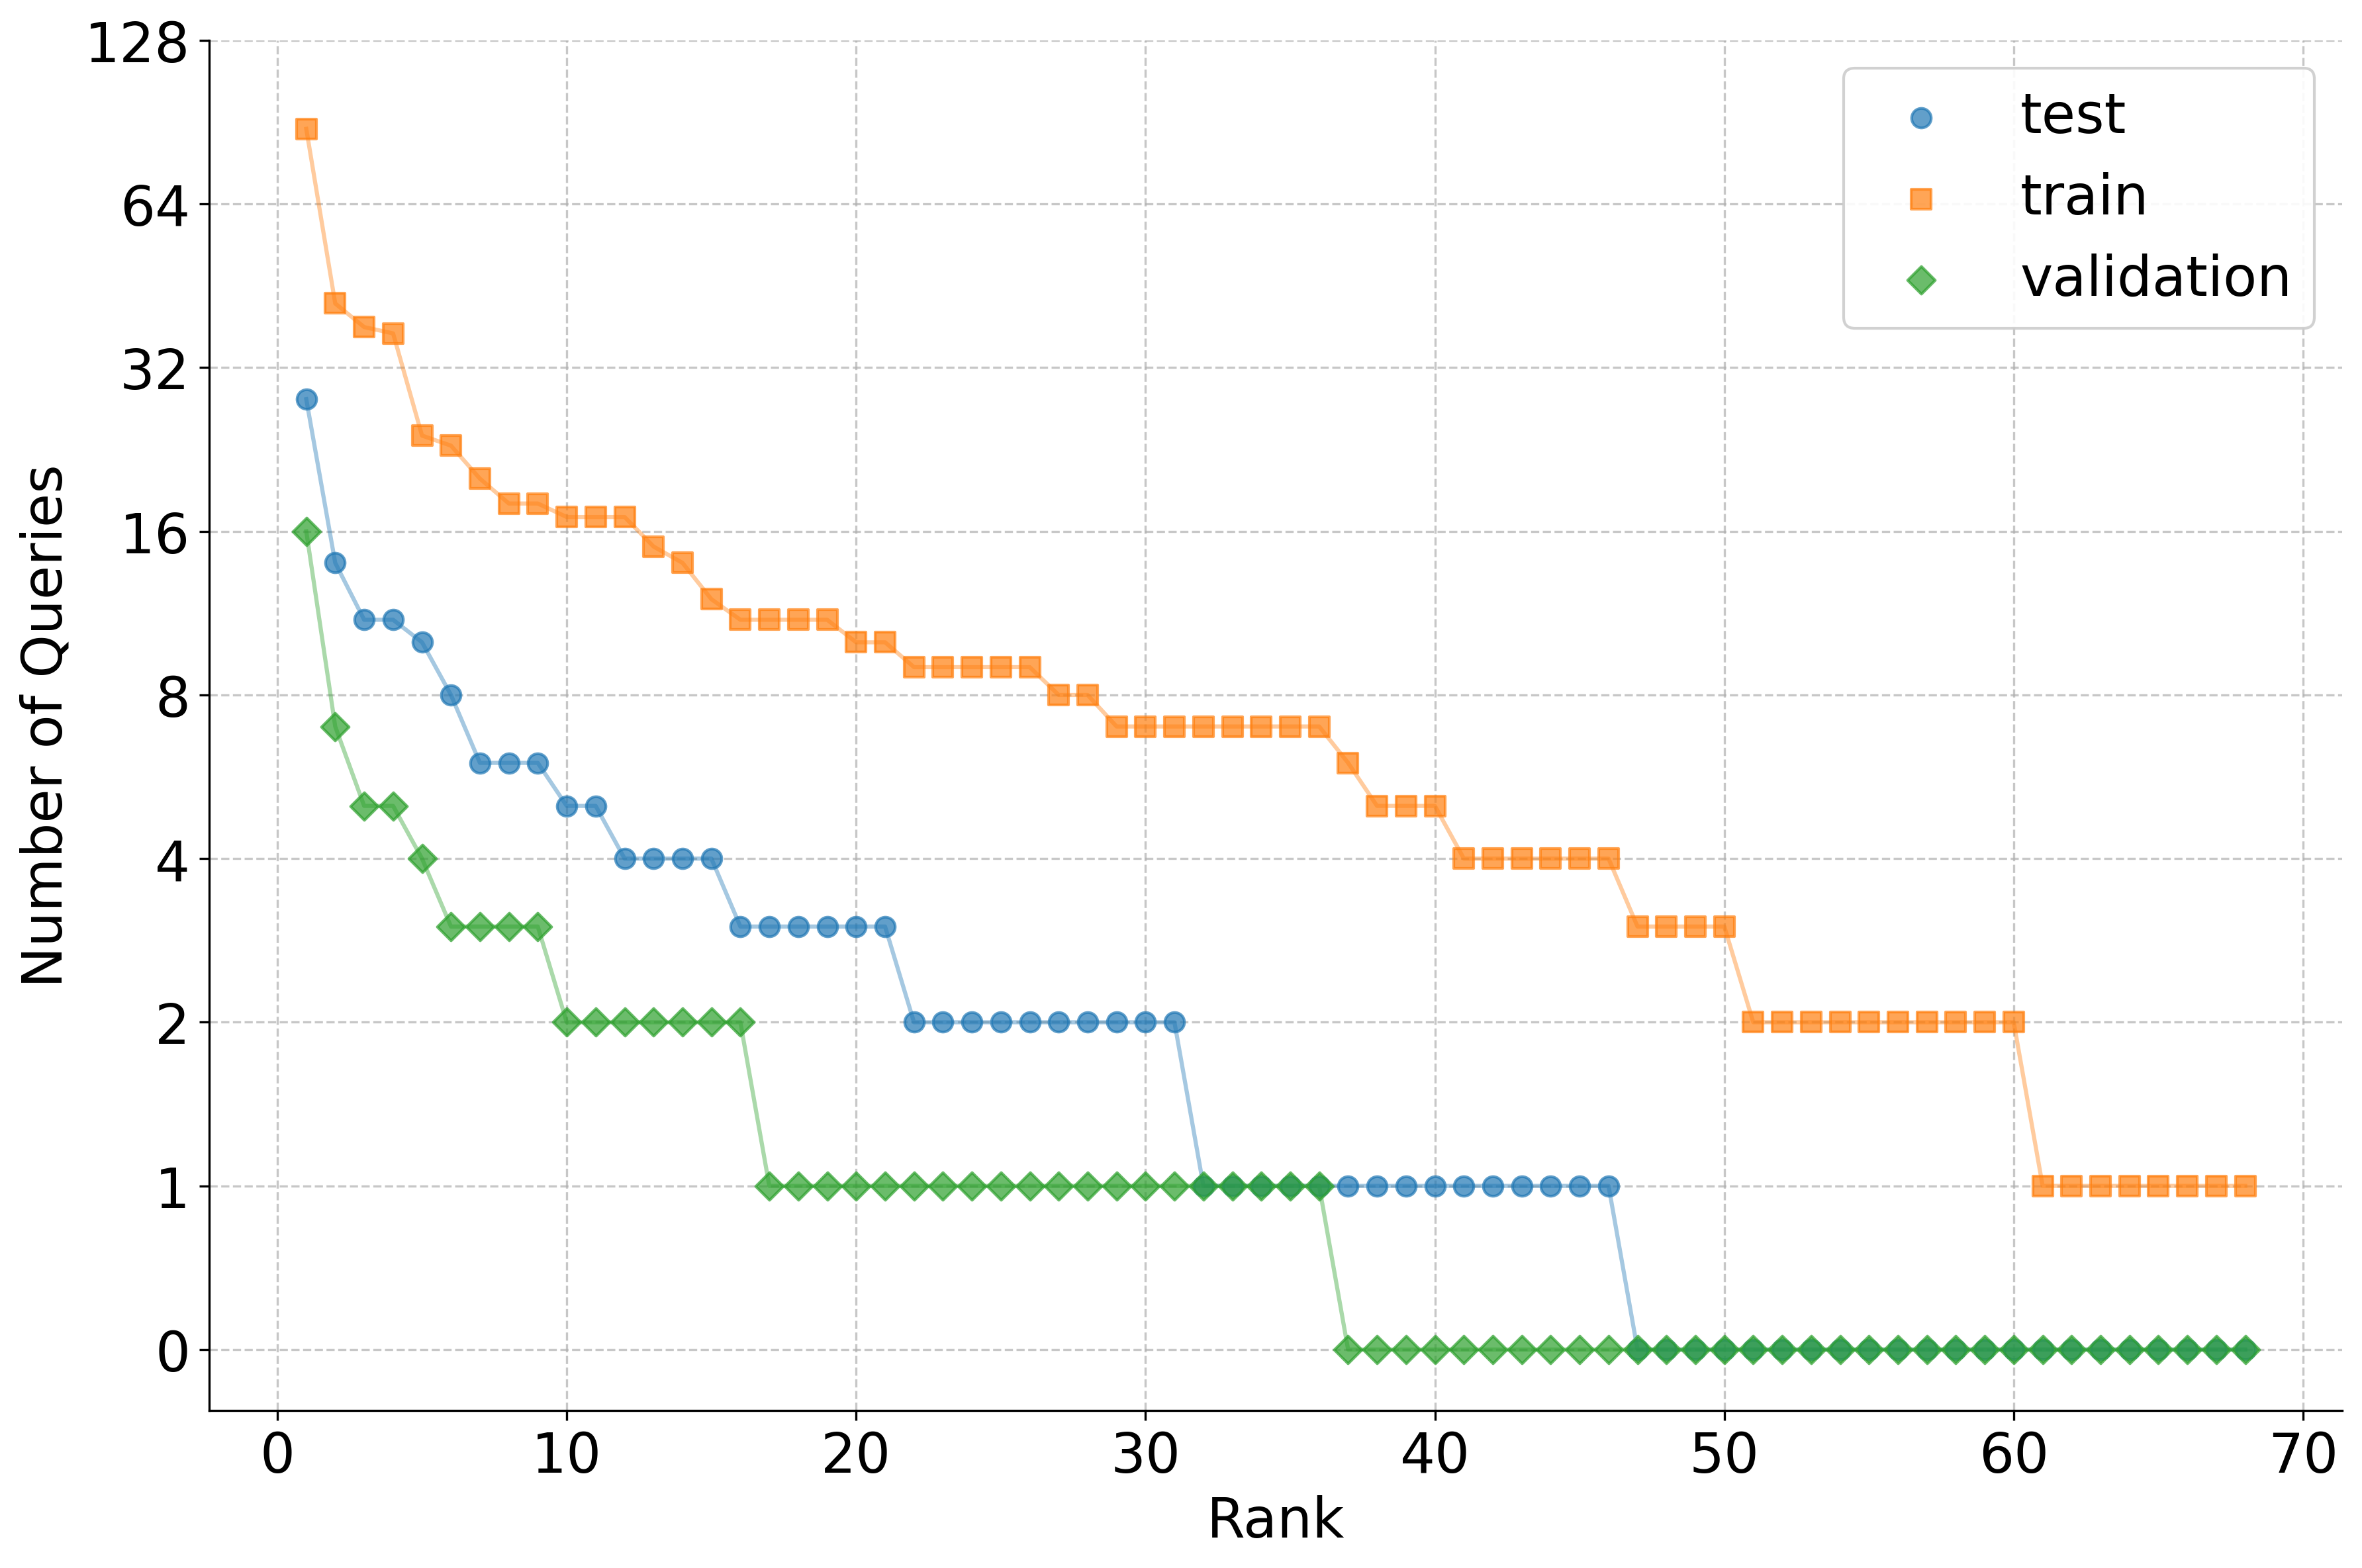

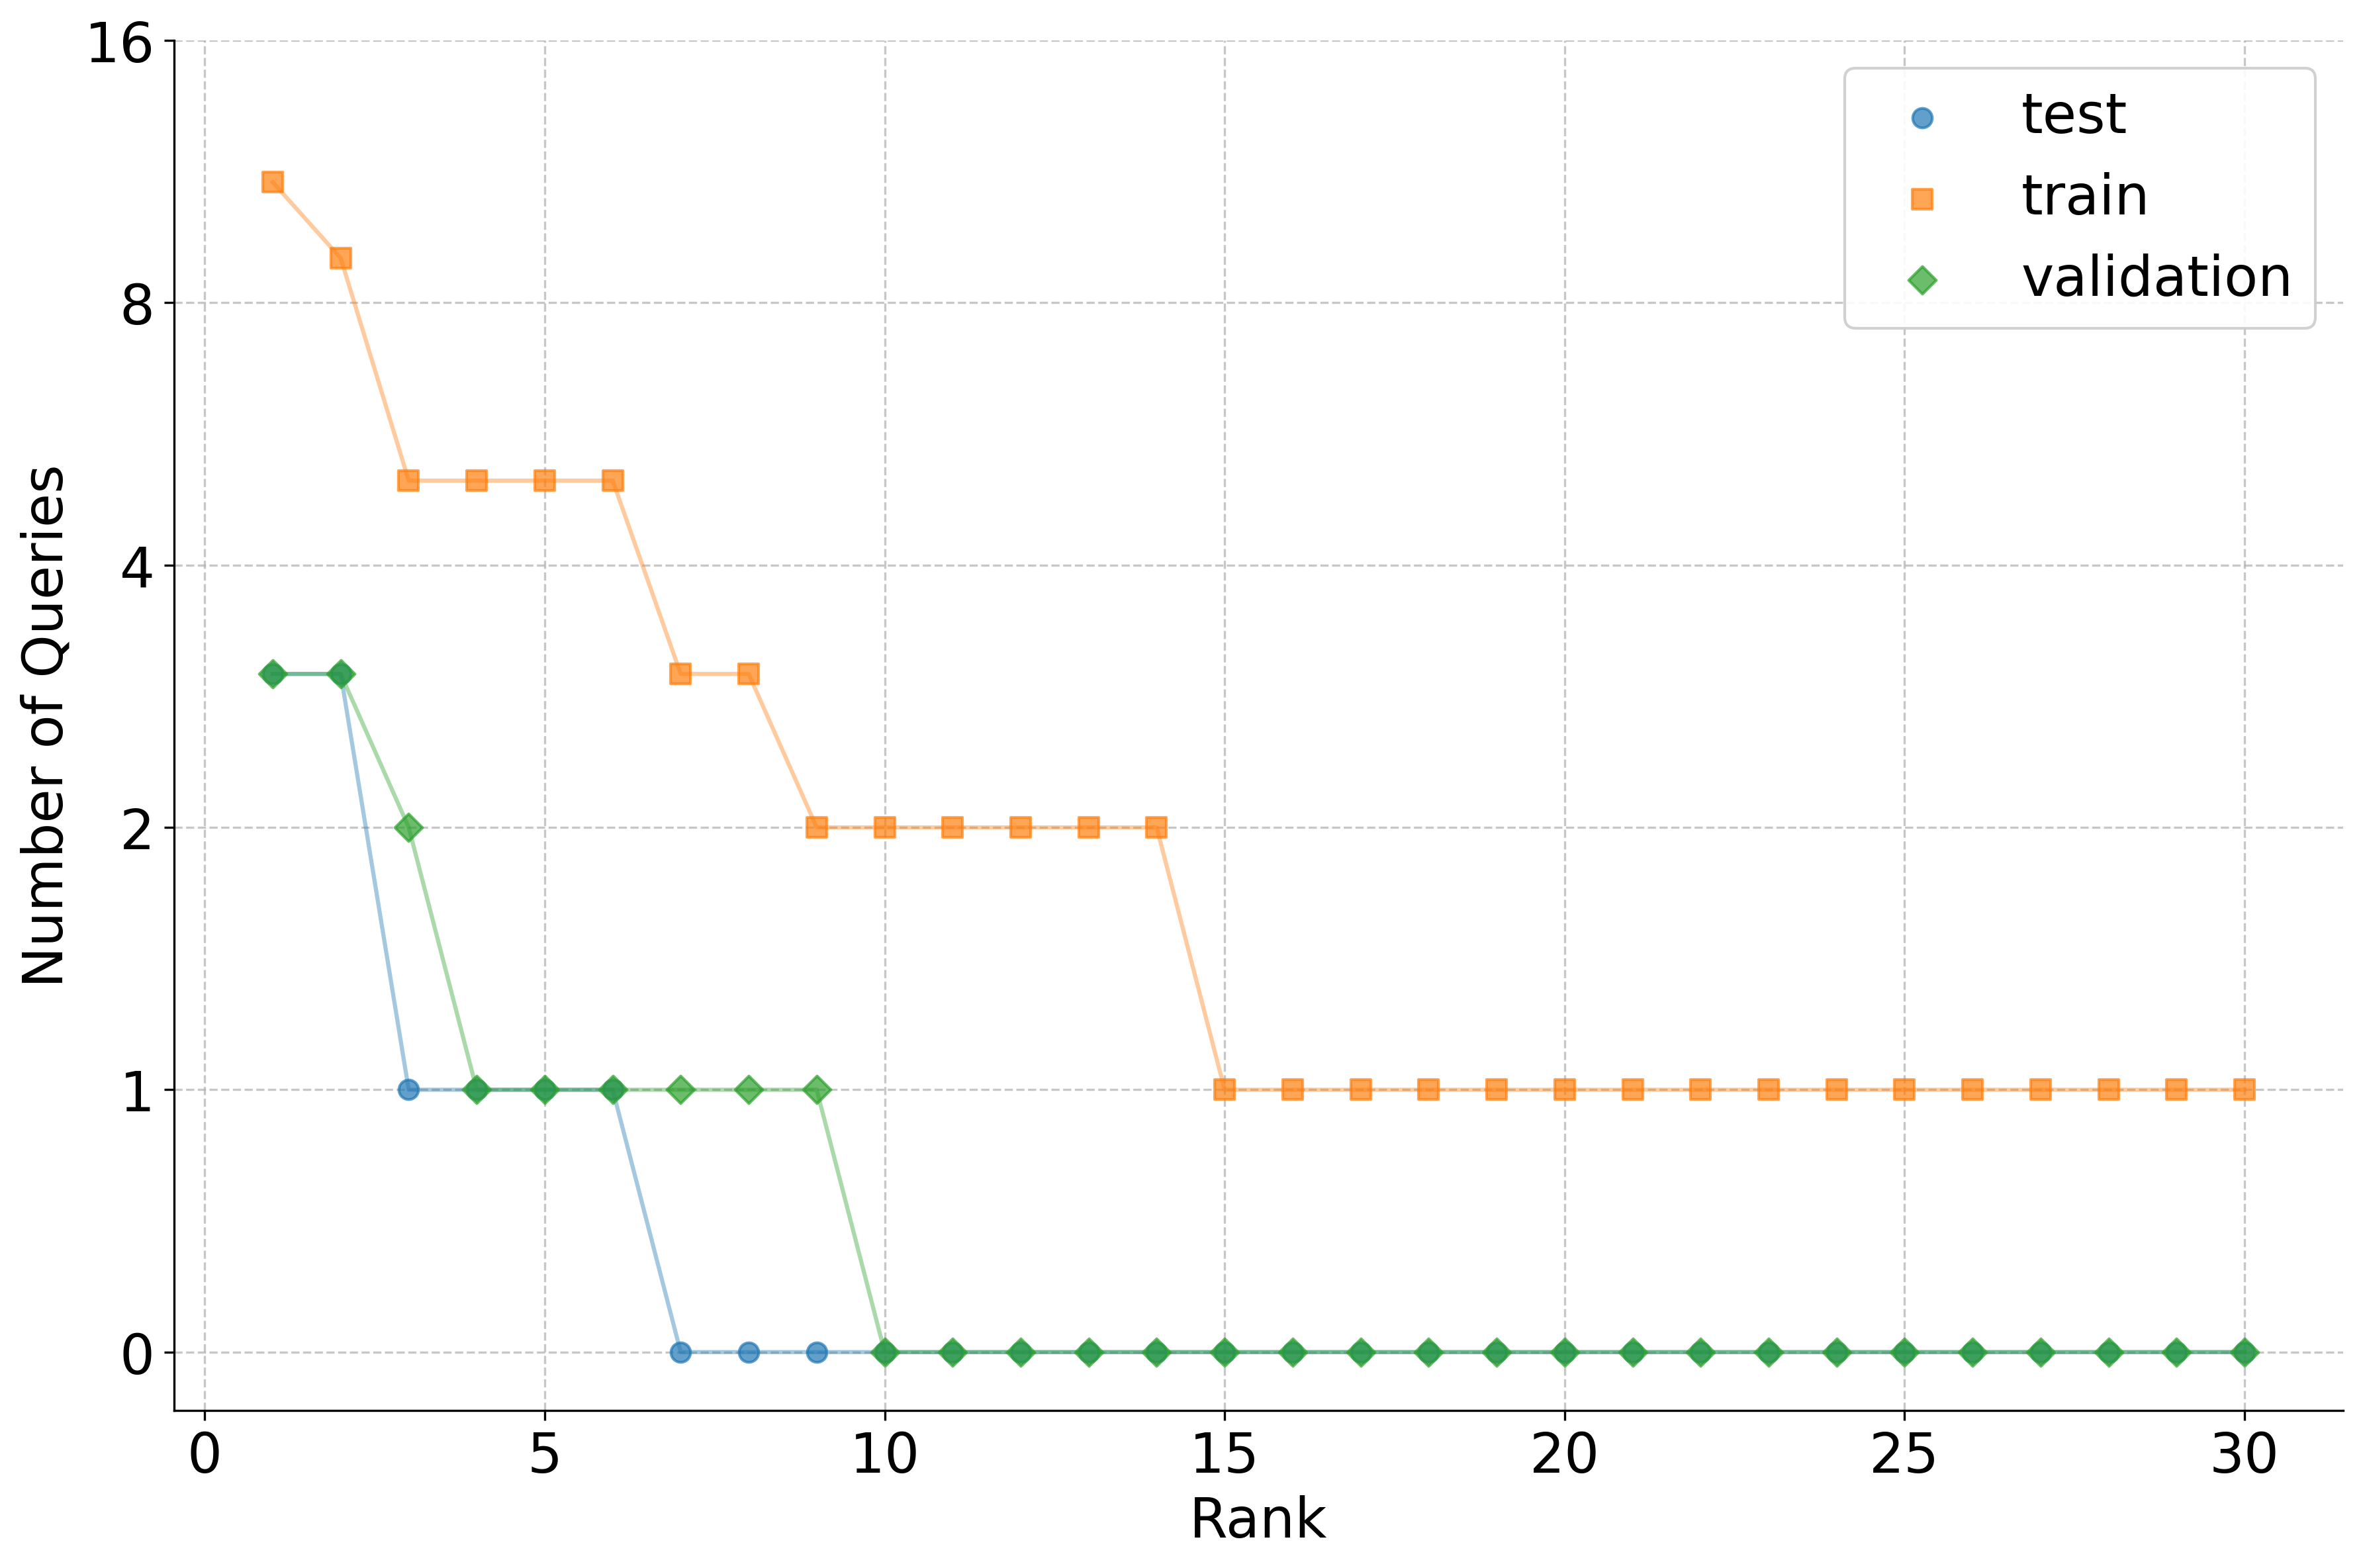

In [7]:
# create a rank frequency plot for label query counts across the splits for each scenario

import numpy as np
from src.statistics.utils_general import create_combined_rank_frequency_plot
from src.statistics.in_distribution_split.utils import get_max_counts_per_scenario



topic_max_counts = get_max_counts_per_scenario(number_of_queries_per_scenario_label)
scenarios = number_of_queries_per_scenario_label["scenario"].unique()

for scenario in scenarios:
    max_count = topic_max_counts[scenario]
    y_max = np.exp2(int(np.log2(max_count)) + 1)

    scenario_split_query_label_counts = (
            number_of_queries_per_scenario_label
            .query("scenario == @scenario")
            .pivot(index="label", columns="split", values="count")
            .fillna(0)
            .sort_values("train", ascending=False)
        )

    fig, ax = create_combined_rank_frequency_plot(
        scenario_split_query_label_counts,
        figsize=(12, 8),
        ylabel='Number of Queries',
        log_y="symlog",
        linthresh=1,
        y_max=y_max
    )
    fig.show()

    plt.savefig(f'{output_folder}/query_label_frequency_{scenario}.eps', format="eps")



Counting 'passages' labels for splits '['train', 'validation', 'test']'


split,test,train,validation
label,,,
Z.K3-1-1,23,23,23
Z.K11-1,22,22,22
FAQ.4,22,22,22
Z.K3-2,22,22,22
Z.K19-1,22,22,22


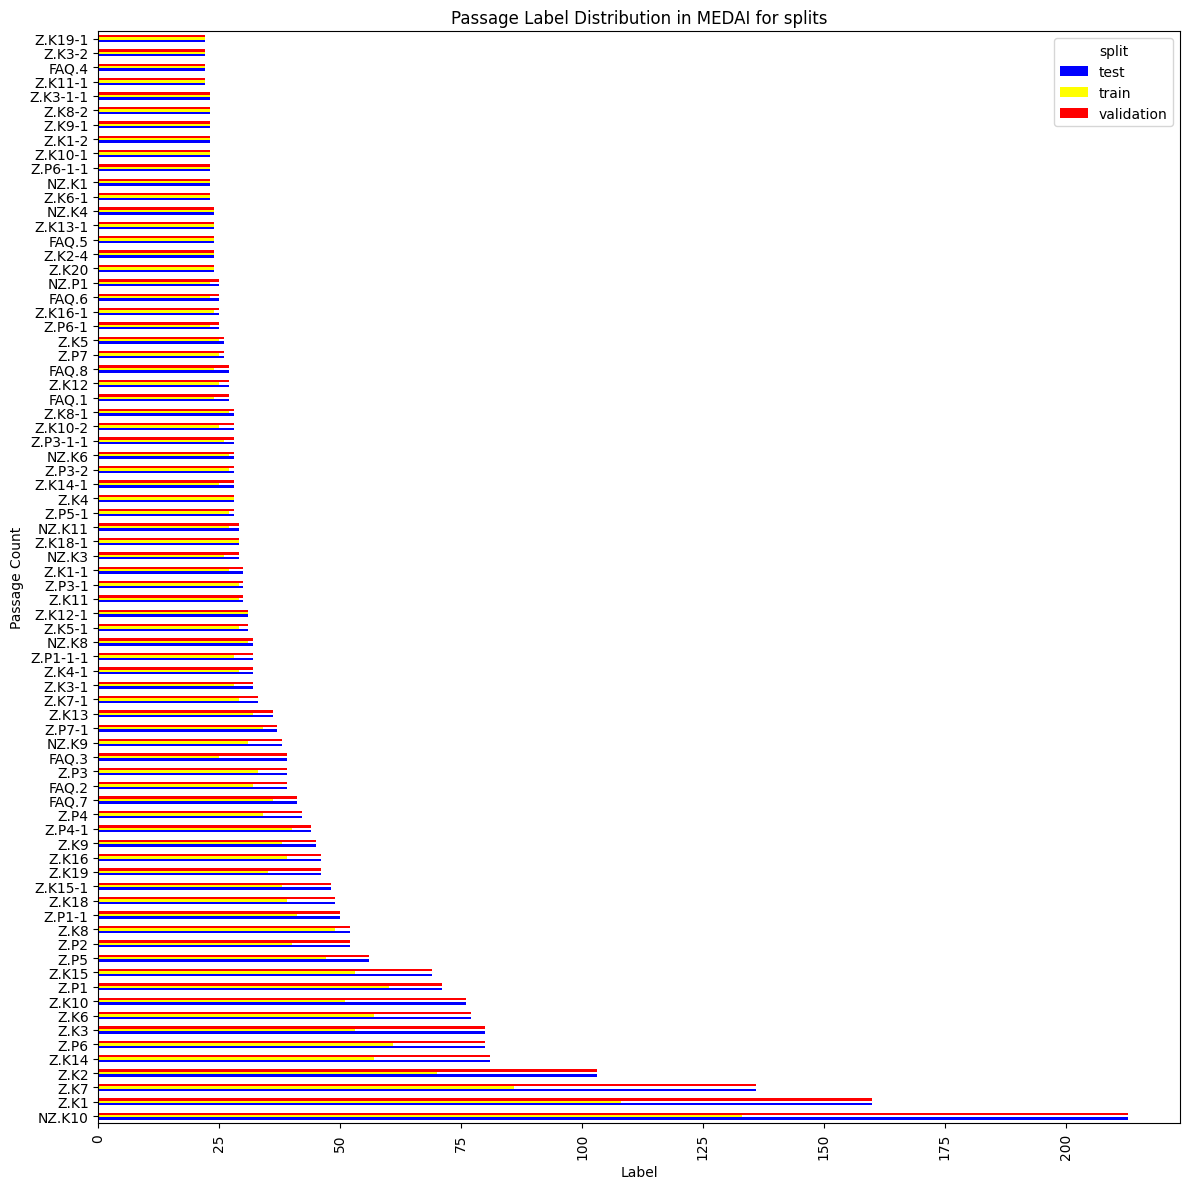

split,test,train,validation
label,,,
Z.K8-1,22,22,22
Z.K13-1,22,22,22
Z.K15-1,22,22,22
Z.P2-2-1,22,22,22
Z.K14-1,22,22,22


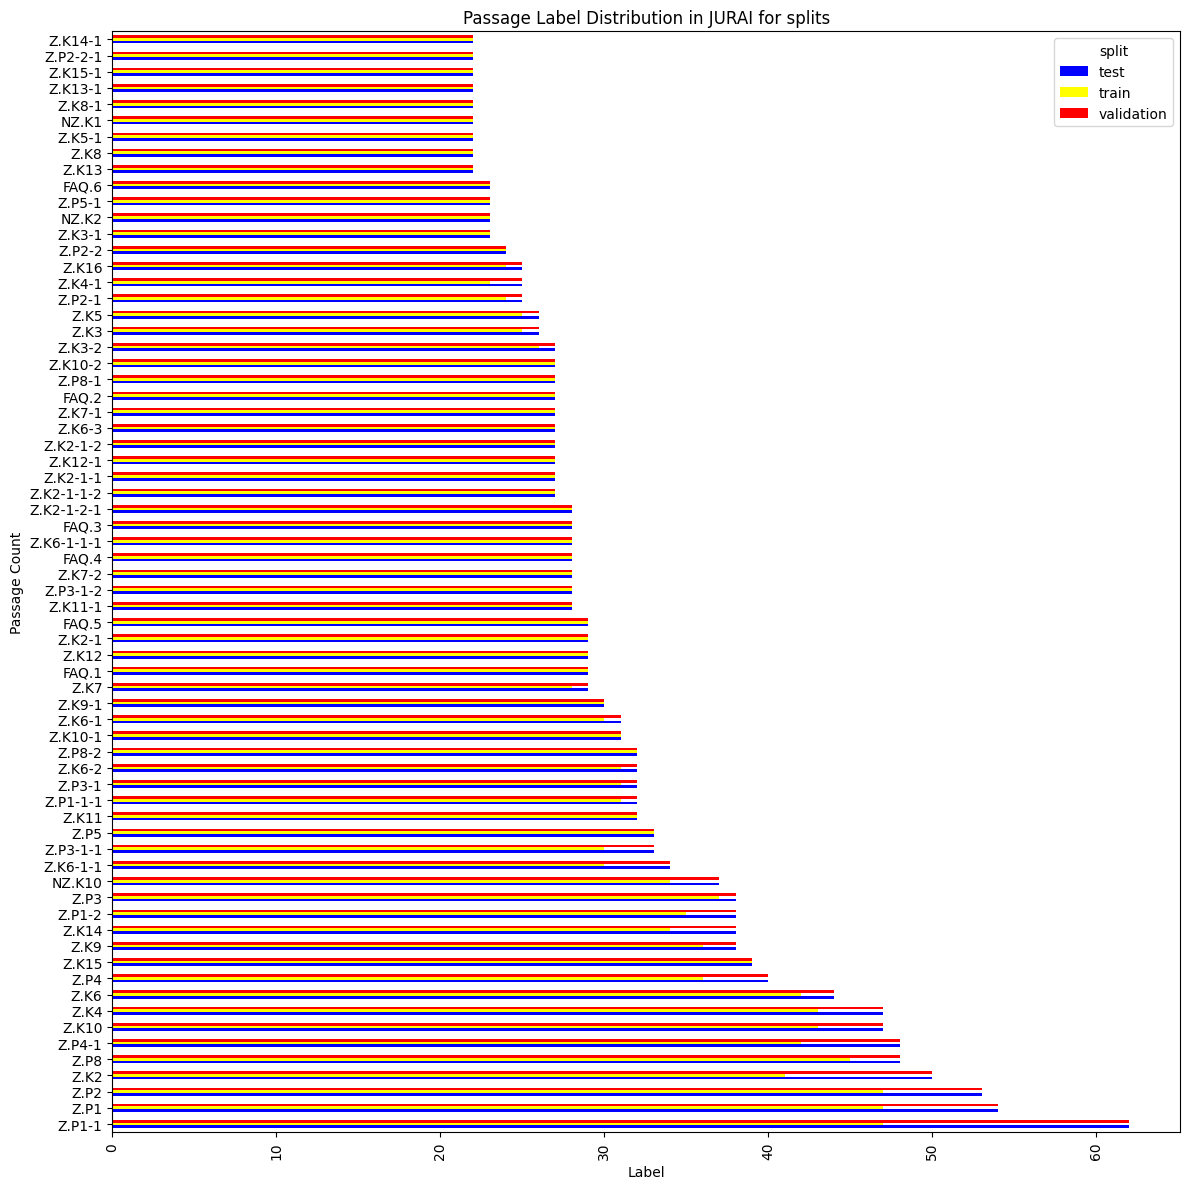

split,test,train,validation
label,,,
Z.C13,24,23,24
Z.P15-1,22,22,22
Z.C12-1,22,22,22
FAQ.2,22,22,22
FAQ.1,22,22,22


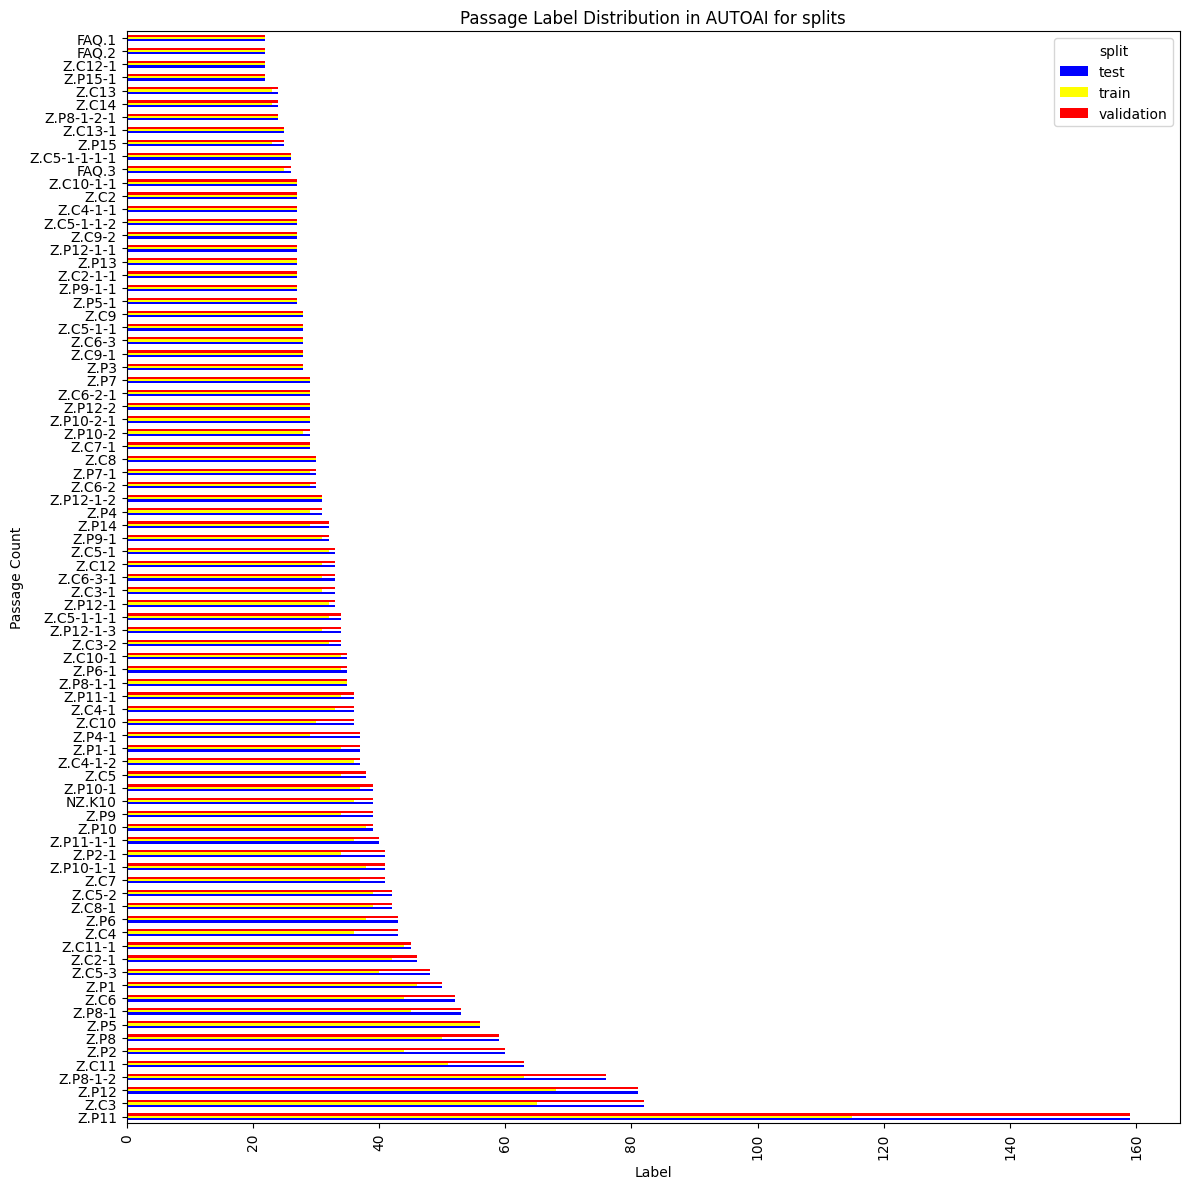

split,test,train,validation
label,,,
Z.K9-2,22,22,22
Z.P-4-1-1,22,22,22
Z.P1-2,22,22,22
Z.P1-3,22,22,22
Z.P9-2,22,22,22


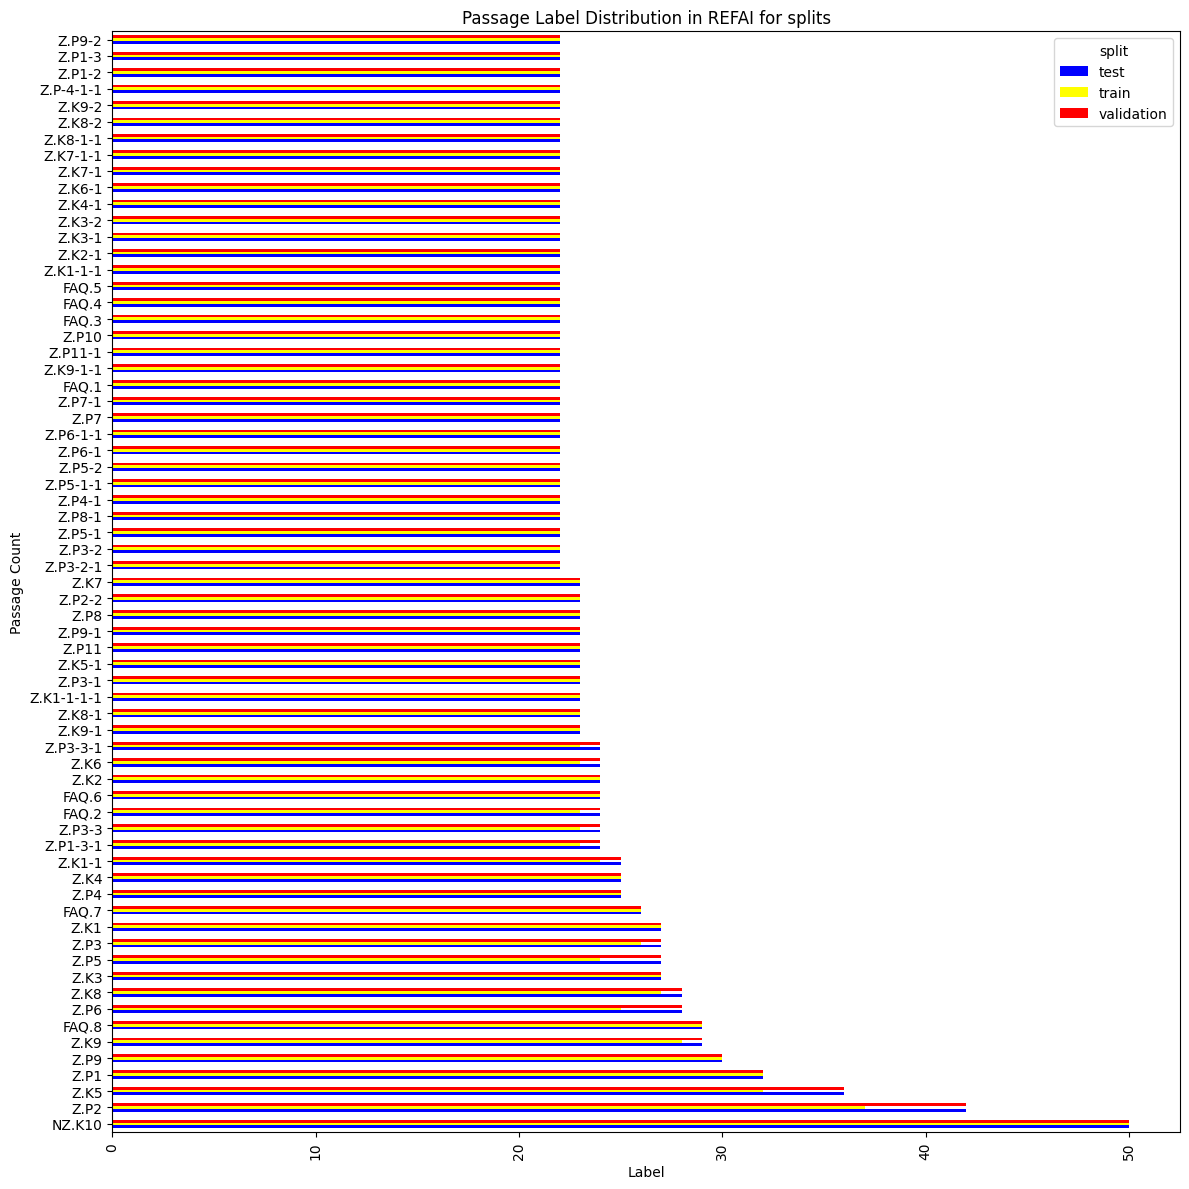

In [8]:
# Count labels per scenario and split for passages
from src.statistics.in_distribution_split.utils import get_split_key_count_per_scenario_label
df = get_split_key_count_per_scenario_label(in_distribution_split, "passages", "label")
df

# Plot stacked bar chart per scenario
scenarios = df["scenario"].unique()
for scenario in scenarios:
    df_scenario = df[df["scenario"] == scenario]
    pivot_df = df_scenario.pivot(index="label", columns="split", values="count").fillna(0).sort_values("test",
                                                                                                       ascending=False)
    display(pivot_df.tail())
    pivot_df.plot(kind="barh", stacked=False, color=["blue", "yellow", "red"], figsize=(12, 12))
    plt.title(f"Passage Label Distribution in {scenario} for splits")
    plt.ylabel("Passage Count")
    plt.xlabel("Label")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

In [9]:
def check_label_distribution(df):
    """
    Checks that any (scenario, label) pair found in 'validation' or 'test'
    also exists in 'train'. If not, prints out the faulty scenario-label pairs.
    Otherwise, confirms that the distribution is valid.
    """
    # Get all (scenario, label) pairs that appear in train (count > 0)
    train_pairs = df[(df["split"] == "train") & (df["count"] > 0)][["scenario", "label"]]
    allowed_pairs = set(zip(train_pairs["scenario"], train_pairs["label"]))

    # Find all pairs in validation/test that have count > 0
    non_train = df[df["split"].isin(["validation", "test"]) & (df["count"] > 0)].copy()

    # Mark which of these are allowed
    non_train["is_allowed"] = non_train.apply(
        lambda row: (row["scenario"], row["label"]) in allowed_pairs, axis=1
    )

    # Collect the ones that are not allowed
    faulty = non_train[~non_train["is_allowed"]]

    if len(faulty) > 0:
        print("Found scenario/label pairs in test/validation that do not appear in train:")
        print(faulty[["scenario", "label", "split", "count"]])
    else:
        print("All scenario/label pairs in test and validation are valid (they appear in train).")


check_label_distribution(df)




All scenario/label pairs in test and validation are valid (they appear in train).
